In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

#2. The Factors
DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a size and value factor. Note that these three factors are already listed as excess returns.

Data
Use the data found in data/dfa_analysis_data.xlsx.

Monthly excess return data for the overall equity market, 
.

The sheet also contains data on two additional factors, SMB and HML, as well as the risk-free rate.

You do not need any of these columns for the homework. Just use the MKT column, which is excess market returns. (So no need to subtract the risk-free rate.)

Source:
Ken French library, accessible through the pandas-datareader API.

In [22]:
factor = pd.read_excel('data\dfa_analysis_data.xlsx', sheet_name='factors')
factor = factor.set_index('Date')
factor.index = pd.to_datetime(factor.index, format='%Y%m%d')
returns = pd.read_excel('data\dfa_analysis_data.xlsx', sheet_name='portfolios (total returns)')
returns = returns.set_index('Date')
returns.index = pd.to_datetime(returns.index, format='%Y%m%d')

1. The Factors
Calculate their univariate performance statistics:

mean

volatility

Sharpe

VaR(.05)

Report these for the following three subsamples:

Beginning - 1980

1981 - 2001

2002 - End

In [23]:
freq = 12

factor_1 = factor.loc[:'1980'].copy()
factor_2 = factor.loc['1981':'2001'].copy()
factor_3 = factor.loc['2002':].copy()

def statistic(return_df, freq=12):
    mean = return_df.mean() * freq
    std = return_df.std() * np.sqrt(freq)
    Sharpe_ratio = mean / std
    VaR = return_df.quantile(0.05)
    return mean, std, Sharpe_ratio, VaR

mean_1, std_1, Sharpe_ratio_1, VaR_1 = statistic(factor_1, freq)
mean_2, std_2, Sharpe_ratio_2, VaR_2 = statistic(factor_2, freq)
mean_3, std_3, Sharpe_ratio_3, VaR_3 = statistic(factor_3, freq)

Table = pd.DataFrame({
    'Mean_1980': mean_1,
    'Std_1980': std_1,
    'Sharpe_ratio_1980': Sharpe_ratio_1,
    'VaR_1980': VaR_1,
    'Mean_1981-2001': mean_2,
    'Std_1981-2001': std_2,
    'Sharpe_ratio_1981-2001': Sharpe_ratio_2,
    'VaR_1981-2001': VaR_2,
    'Mean_2002-': mean_3,
    'Std_2002-': std_3,
    'Sharpe_ratio_2002-': Sharpe_ratio_3,
    'VaR_2002-': VaR_3
})

print(Table.round(4))

        Mean_1980  Std_1980  Sharpe_ratio_1980  VaR_1980  Mean_1981-2001  \
Mkt-RF     0.0810    0.2050             0.3949   -0.0841          0.0779   
SMB        0.0339    0.1143             0.2968   -0.0419         -0.0020   
HML        0.0503    0.1342             0.3749   -0.0442          0.0646   
RF         0.0277    0.0077             3.6140    0.0000          0.0631   

        Std_1981-2001  Sharpe_ratio_1981-2001  VaR_1981-2001  Mean_2002-  \
Mkt-RF         0.1572                  0.4953        -0.0641      0.0913   
SMB            0.1173                 -0.0172        -0.0459      0.0079   
HML            0.1099                  0.5876        -0.0416      0.0012   
RF             0.0078                  8.1372         0.0025      0.0158   

        Std_2002-  Sharpe_ratio_2002-  VaR_2002-  
Mkt-RF     0.1535              0.5947    -0.0773  
SMB        0.0884              0.0897    -0.0392  
HML        0.1064              0.0113    -0.0415  
RF         0.0052              3.0

2.
Based on the factor statistics above, answer the following.

Does each factor have a premium (positive expected excess return) in each subsample?

Does the premium to the size factor get smaller after 1980?

Does the premium to the value factor get smaller during the 1990’s?

How have the factors performed since the time of the case, (2002-present)?

ANS:

1. No, SMB in 1981-2001 has negative mean return.
2. Yes, the size factor become -0.0020 and 0.0079 from 0.0339 befor 1980.
3. No, it is stable within 1980~2000 period, but become smaller later.
4. MRT-RF remains stable, while SMB and HML become relatively small. We can see that from Sharpe ratio and absolute mean rerturn.

3.
The factors are constructed in such a way as to reduce correlation between them.

Report the correlation matrix across the three factors.

Does the construction method succeed in keeping correlations small?

Does it achieve this in each subsample?

In [24]:
factor_only = factor.copy()
factor_only.drop(columns=['RF'], inplace=True)

def corr_print(df, Title = ""):
    C = df.corr()

    mask = np.eye(C.shape[0], dtype=bool)
    max_abs_corr = C.mask(mask).abs().max().max()
    print(Title, " Correlation Matrix:")
    print(C.round(3))
    print(f"Max |corr| (off-diagonal): {max_abs_corr:.3f}")
    return None

corr_print(factor_only, Title = "Whole Period")
corr_print(factor_1.drop(columns=['RF']), Title = "Up to 1980")
corr_print(factor_2.drop(columns=['RF']), Title = "1981-2001")
corr_print(factor_3.drop(columns=['RF']), Title = "2002 and after") 


Whole Period  Correlation Matrix:
        Mkt-RF    SMB    HML
Mkt-RF   1.000  0.320  0.228
SMB      0.320  1.000  0.126
HML      0.228  0.126  1.000
Max |corr| (off-diagonal): 0.320
Up to 1980  Correlation Matrix:
        Mkt-RF    SMB    HML
Mkt-RF   1.000  0.374  0.442
SMB      0.374  1.000  0.313
HML      0.442  0.313  1.000
Max |corr| (off-diagonal): 0.442
1981-2001  Correlation Matrix:
        Mkt-RF    SMB    HML
Mkt-RF   1.000  0.159 -0.530
SMB      0.159  1.000 -0.445
HML     -0.530 -0.445  1.000
Max |corr| (off-diagonal): 0.530
2002 and after  Correlation Matrix:
        Mkt-RF    SMB    HML
Mkt-RF   1.000  0.316  0.110
SMB      0.316  1.000  0.116
HML      0.110  0.116  1.000
Max |corr| (off-diagonal): 0.316


ANS: Correlation among factors are relatively small amount whole period and subsamples.

4.
Plot the cumulative returns of the three factors.

Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

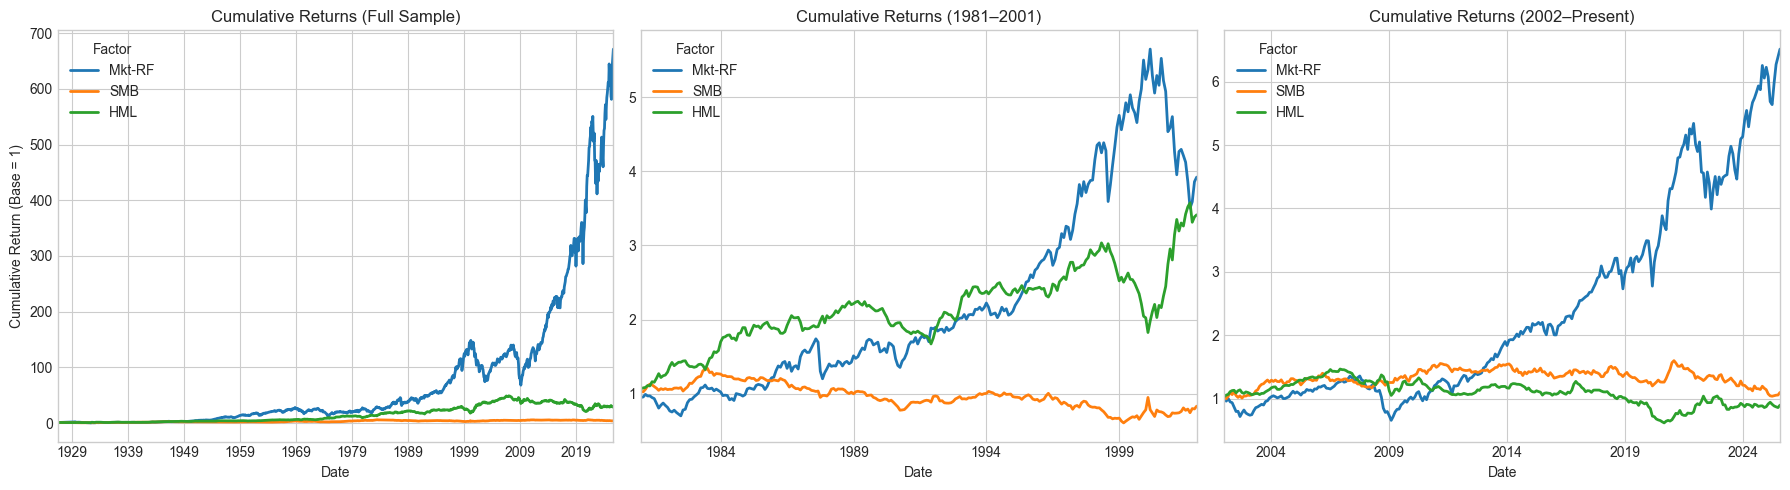

In [25]:
cum_full = (1 + factor_only).cumprod()

sub_1 = factor_only.loc["1981":"2001"].copy()
sub_2 = factor_only.loc["2002":].copy()

cum_1 = (1 + sub_1).cumprod()
cum_2 = (1 + sub_2).cumprod()

# === Plot ===
plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=False)

# Full Sample
cum_full.plot(ax=axes[0], linewidth=2)
axes[0].set_title("Cumulative Returns (Full Sample)")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Cumulative Return (Base = 1)")
axes[0].legend(title="Factor")

# 1981–2001
cum_1.plot(ax=axes[1], linewidth=2)
axes[1].set_title("Cumulative Returns (1981–2001)")
axes[1].set_xlabel("Date")
axes[1].legend(title="Factor")

# 2002–Present
cum_2.plot(ax=axes[2], linewidth=2)
axes[2].set_title("Cumulative Returns (2002–Present)")
axes[2].set_xlabel("Date")
axes[2].legend(title="Factor")

plt.tight_layout()
plt.show()

5.
Does it appear that all three factors were valuable in 1981-2001?

And post-2001?

Would you advise DFA to continue emphasizing all three factors?

ANS:

No, only "Mkt-RF" and "HML" remained valuabe in 1981-2001.
And only  "Mkt-RF" remained valuabe post-2001.
I would not advise DFA to continue emphasizing all three factors.

#3. CAPM
DFA believes that premia in stocks and stock portfolios is related to the three factors.

Let’s test 25 equity portfolios that span a wide range of size and value measures.

Footnote
For more on the portfolio construction, see the description at Ken French’s data library. https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports.html

Portfolios
Monthly total return data on 25 equity portfolios sorted by their size-value characteristics. Denote these as 
, for 
.

Note that while the factors were given as excess returns, the portfolios are total returns.

For this entire problem, focus on the 1981-Present subsample.

1. Summary Statistics.
For each portfolio,

Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.

Calculate the (annualized) univariate statistics from 1.1.

In [26]:
excess_returns = returns.subtract(factor['RF'], axis=0)
df = excess_returns["1981":].copy()

mean_4, std_4, Sharpe_ratio_4, VaR_4 = statistic(df, freq)

Table_2 = pd.DataFrame({
    'Mean': mean_4,
    'Std': std_4,
    'Sharpe_ratio': Sharpe_ratio_4,
    'VaR': VaR_4,
})

print(Table_2.round(4))

              Mean     Std  Sharpe_ratio     VaR
SMALL LoBM  0.0117  0.2717        0.0431 -0.1249
ME1 BM2     0.0884  0.2354        0.3756 -0.0949
ME1 BM3     0.0902  0.2008        0.4493 -0.0848
ME1 BM4     0.1125  0.1940        0.5800 -0.0776
SMALL HiBM  0.1273  0.2084        0.6110 -0.0882
ME2 BM1     0.0609  0.2447        0.2490 -0.1032
ME2 BM2     0.0984  0.2054        0.4790 -0.0834
ME2 BM3     0.1052  0.1864        0.5640 -0.0803
ME2 BM4     0.1081  0.1819        0.5942 -0.0753
ME2 BM5     0.1132  0.2137        0.5298 -0.0933
ME3 BM1     0.0694  0.2237        0.3103 -0.0995
ME3 BM2     0.1040  0.1871        0.5555 -0.0786
ME3 BM3     0.0910  0.1729        0.5264 -0.0732
ME3 BM4     0.1053  0.1797        0.5863 -0.0722
ME3 BM5     0.1240  0.2024        0.6125 -0.0845
ME4 BM1     0.0919  0.2008        0.4575 -0.0835
ME4 BM2     0.0937  0.1761        0.5323 -0.0723
ME4 BM3     0.0920  0.1742        0.5282 -0.0762
ME4 BM4     0.1059  0.1741        0.6081 -0.0688
ME4 BM5     0.1056  

2. CAPM
The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio’s) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT.)

Specifically, it asserts that, for any excess return, 
, its mean is proportional to the mean excess return of the market, 
, where the proporitonality is the regression beta of 
 on 
.

Let’s examine whether that seems plausible.

For each of the 
 test portfolios, run the CAPM time-series regression:

So you are running 25 separate regressions, each using the 
-sized sample of time-series data.

Report the betas and alphas for each test asset.

Report the mean-absolute-error of the CAPM: $
 
$

If the CAPM were true, what would we expect of the MAE?

Report the estimated 
, Treynor Ratio, 
, and Information Ratio for each of the 
 regressions.

If the CAPM model were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

In [27]:
import statsmodels.api as sm

X = sm.add_constant(factor["Mkt-RF"]["1981":]) 


alphas, betas, r2, treynor, info_ratio = {}, {}, {}, {}, {}

for col in df.columns:
    y = df[col]
    model = sm.OLS(y, X).fit()
    alpha = model.params["const"]
    beta = model.params["Mkt-RF"]
    resid = model.resid

    alphas[col] = alpha
    betas[col] = beta
    r2[col] = model.rsquared

    # Treynor ratio = mean(excess return) / beta
    treynor[col] = y.mean() / beta if beta != 0 else np.nan

    # Information ratio = alpha / std(residual)
    info_ratio[col] = alpha / resid.std()

# === Table ===
capm_results = pd.DataFrame({
    "Alpha": alphas,
    "Beta (Mkt)": betas,
    "R^2": r2,
    "Treynor Ratio": treynor,
    "Information Ratio": info_ratio
}).T.round(4)

# === Mean Absolute Error of CAPM ===
MAE = np.mean(np.abs(capm_results.loc["Alpha"]))
print(f"\nMean Absolute Error (|alpha| average): {MAE:.4%}")

# === 輸出結果表格 ===
print("\nCAPM Regression Results:")
print(capm_results)


Mean Absolute Error (|alpha| average): 0.1728%

CAPM Regression Results:
                   SMALL LoBM  ME1 BM2  ME1 BM3  ME1 BM4  SMALL HiBM  ME2 BM1  \
Alpha                 -0.0086  -0.0009   0.0001   0.0025      0.0036  -0.0044   
Beta (Mkt)             1.3585   1.1658   1.0495   0.9773      0.9939   1.3341   
R^2                    0.6014   0.5900   0.6571   0.6105      0.5476   0.7154   
Treynor Ratio          0.0007   0.0063   0.0072   0.0096      0.0107   0.0038   
Information Ratio     -0.1746  -0.0204   0.0025   0.0703      0.0883  -0.1160   

                   ME2 BM2  ME2 BM3  ME2 BM4  ME2 BM5  ...  ME4 BM1  ME4 BM2  \
Alpha               0.0001   0.0014   0.0021   0.0016  ...  -0.0007   0.0003   
Beta (Mkt)          1.1390   1.0357   0.9765   1.1108  ...   1.1800   1.0577   
R^2                 0.7401   0.7426   0.6937   0.6505  ...   0.8308   0.8685   
Treynor Ratio       0.0072   0.0085   0.0092   0.0085  ...   0.0065   0.0074   
Information Ratio   0.0043   0.0523   0


ANS: 
If the CAPM were true, we expect the MAE to be near 0, and the sample result is 0.17% per month.

If the CAPM model were true, the true of the Treynor Ratios would be near the Sharpe ratio of the market, alphas and information ratios should be near 0. Treynor Ratios doesn't fit the assumtion, while alpha and information ratios are relatively small.

In [28]:

market_mean = factor["Mkt-RF"]["1980":].mean()
market_std = factor["Mkt-RF"]["1980":].std()
market_sharpe = market_mean / market_std

print(f"Market Sharpe Ratio(Monthly): {market_sharpe:.4f}")

summary_compare = pd.DataFrame({
    "Mean Treynor Ratio": [capm_results.loc["Treynor Ratio"].mean()],
    "Market Sharpe Ratio": [market_sharpe],
    "Mean Alpha (%)": [capm_results.loc["Alpha"].mean() * 100],
    "Mean |Alpha| (%)": [np.abs(capm_results.loc["Alpha"]).mean() * 100],
    "Mean Information Ratio": [capm_results.loc["Information Ratio"].mean()]
}).T.round(4)

print("\n=== CAPM Summary Comparison ===")
print(summary_compare)

top_alpha = capm_results.loc["Alpha"].sort_values(ascending=False)
top_info = capm_results.loc["Information Ratio"].sort_values(ascending=False)

print("\nTop 5 Assets by Alpha:")
print(top_alpha.head(5))

print("\nTop 5 Assets by Information Ratio:")
print(top_info.head(5))

Market Sharpe Ratio(Monthly): 0.1618

=== CAPM Summary Comparison ===
                             0
Mean Treynor Ratio      0.0075
Market Sharpe Ratio     0.1618
Mean Alpha (%)          0.0272
Mean |Alpha| (%)        0.1728
Mean Information Ratio  0.0160

Top 5 Assets by Alpha:
SMALL HiBM    0.0036
ME3 BM5       0.0029
ME1 BM4       0.0025
ME2 BM4       0.0021
ME4 BM4       0.0019
Name: Alpha, dtype: float64

Top 5 Assets by Information Ratio:
SMALL HiBM    0.0883
ME3 BM5       0.0832
ME4 BM4       0.0768
ME2 BM4       0.0720
ME1 BM4       0.0703
Name: Information Ratio, dtype: float64


3. Cross-sectional Estimation
Let’s test the CAPM directly. We already have what we need:

The dependent variable, (y): mean excess returns from each of the 
 portfolios.

The regressor, (x): the market beta from each of the 
 time-series regressions.

Then we can estimate the following equation:


Note that

we use sample means as estimates of 
.

this is a weird regression! The regressors are the betas from the time-series regressions we already ran!

this is a single regression, where we are combining evidence across all 
 series. Thus, it is a cross-sectional regression!

the notation is trying to emphasize that the intercept is different than the time-series 
 and that the regressor coefficient is different than the time-series betas.

Report

the R-squared of this regression.

the intercept, 
.

the regression coefficient, 
.

What would these three statistics be if the CAPM were completely accurate?

In [29]:
mean_excess_ret = df.mean()
betas = capm_results.loc["Beta (Mkt)"]

cross_section_df = pd.DataFrame({
    "Mean Excess Return": mean_excess_ret,
    "Beta (Mkt)": betas
}).dropna()

X = sm.add_constant(cross_section_df["Beta (Mkt)"])
y = cross_section_df["Mean Excess Return"]
model_cs = sm.OLS(y, X).fit()

eta = model_cs.params["const"]       # 截距 η
lambda_mkt = model_cs.params["Beta (Mkt)"]  # 市場風險價格 λ_mkt
r2_cs = model_cs.rsquared

print("\n=== Cross-sectional CAPM Estimation ===")
#print(model_cs.summary())

#print(f"\nIntercept (η): {eta:.4%}")
#print(f"Market risk premium (λ_mkt): {lambda_mkt:.4%}")
#print(f"R-squared: {r2_cs:.4f}")

# Summary Table
summary_cs = pd.DataFrame({
    "Statistic": ["Intercept (η)", "Market Price of Risk (λ_mkt)", "R-squared"],
    "Value": [eta, lambda_mkt, r2_cs]
})
print("\nSummary Table:")
print(summary_cs.round(4))


=== Cross-sectional CAPM Estimation ===

Summary Table:
                      Statistic   Value
0                 Intercept (η)  0.0172
1  Market Price of Risk (λ_mkt) -0.0088
2                     R-squared  0.3132


4. Conclusion
Broadly speaking, do these results support DFA’s belieef in size and value portfolios containing premia unrelated to the market premium?

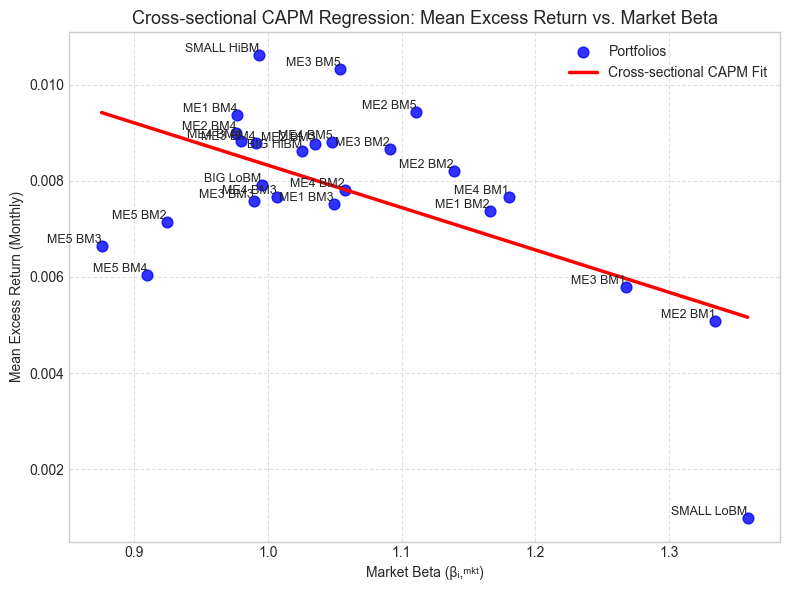

In [30]:

beta_range = np.linspace(cross_section_df["Beta (Mkt)"].min(),
                         cross_section_df["Beta (Mkt)"].max(), 100)
fitted_line = model_cs.params["const"] + model_cs.params["Beta (Mkt)"] * beta_range

plt.figure(figsize=(8,6))
plt.scatter(cross_section_df["Beta (Mkt)"], cross_section_df["Mean Excess Return"],
            color="blue", s=60, alpha=0.8, label="Portfolios")

plt.plot(beta_range, fitted_line, color="red", linewidth=2.5, label="Cross-sectional CAPM Fit")

for name, x, y in zip(cross_section_df.index,
                      cross_section_df["Beta (Mkt)"],
                      cross_section_df["Mean Excess Return"]):
    plt.text(x, y, name, fontsize=9, ha='right', va='bottom')

plt.title("Cross-sectional CAPM Regression: Mean Excess Return vs. Market Beta", fontsize=13)
plt.xlabel("Market Beta (βᵢ,ᵐᵏᵗ)")
plt.ylabel("Mean Excess Return (Monthly)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

ANS:

We can see Portfolio with smaller ME and bigger BM is proform better than what the CAPM predict. This support DFA’s belieef in size and value portfolios containing premia unrelated to the market premium.

#4. Extensions
1.
Re-do the analysis of 3.2 and 3.3, but instead of using the market return as the factor, use a new factor: the in-sample tangency portfolio of the 
 portfolios.

You will not use the factor data for this problem!

Calculate 
 by solving the MV optimization of the 
 excess returns.

Consider this to be your single factor.

Instead of testing the CAPM, you will test the tangency-factor model:

What do you find?


=== Tangency Factor Model: Cross-sectional Regression ===
                            OLS Regression Results                            
Dep. Variable:     Mean Excess Return   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.064e+29
Date:                Fri, 24 Oct 2025   Prob (F-statistic):          1.16e-319
Time:                        16:03:54   Log-Likelihood:                 917.52
No. Observations:                  25   AIC:                            -1831.
Df Residuals:                      23   BIC:                            -1829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

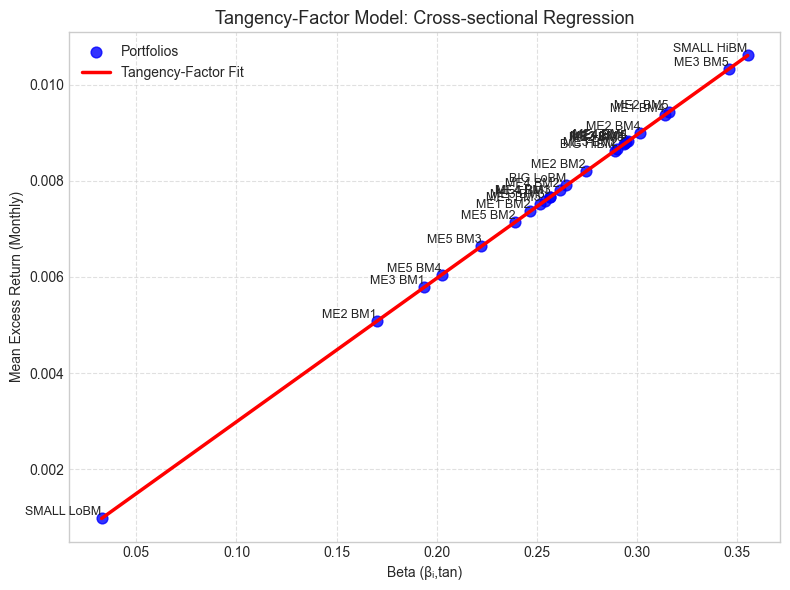

In [31]:
mean_ret = df.mean()
cov_mat = df.cov()
inv_cov = np.linalg.inv(cov_mat)
tan_w = inv_cov @ mean_ret
tan_w = tan_w / tan_w.sum()
tan_ret = df @ tan_w
tan_ret.name = "Tangency Portfolio"

alphas, betas = {}, {}
for col in df.columns:
    y = df[col]
    X = sm.add_constant(tan_ret)
    model = sm.OLS(y, X).fit()
    alphas[col] = model.params["const"]
    betas[col] = model.params["Tangency Portfolio"]

tan_results = pd.DataFrame({
    "Alpha": alphas,
    "Beta_tan": betas
})

mean_excess_ret = df.mean()
cross_df = pd.DataFrame({
    "Mean Excess Return": mean_excess_ret,
    "Beta_tan": tan_results["Beta_tan"]
})

X = sm.add_constant(cross_df["Beta_tan"])
y = cross_df["Mean Excess Return"]
model_cs_tan = sm.OLS(y, X).fit()

eta_tan = model_cs_tan.params["const"]
lambda_tan = model_cs_tan.params["Beta_tan"]
r2_tan = model_cs_tan.rsquared

print("\n=== Tangency Factor Model: Cross-sectional Regression ===")
print(model_cs_tan.summary())

print(f"\nIntercept (η): {eta_tan:.4%}")
print(f"λ_tan (Factor price of risk): {lambda_tan:.4%}")
print(f"R-squared: {r2_tan:.4f}")

beta_range = np.linspace(cross_df["Beta_tan"].min(), cross_df["Beta_tan"].max(), 100)
fit_line = eta_tan + lambda_tan * beta_range

plt.figure(figsize=(8,6))
plt.scatter(cross_df["Beta_tan"], cross_df["Mean Excess Return"],
            color="blue", s=60, alpha=0.8, label="Portfolios")
plt.plot(beta_range, fit_line, color="red", linewidth=2.5, label="Tangency-Factor Fit")

for name, x, y in zip(cross_df.index, cross_df["Beta_tan"], cross_df["Mean Excess Return"]):
    plt.text(x, y, name, fontsize=9, ha='right', va='bottom')

plt.title("Tangency-Factor Model: Cross-sectional Regression", fontsize=13)
plt.xlabel("Beta (βᵢ,tan)")
plt.ylabel("Mean Excess Return (Monthly)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


=== Fama-French 3-Factor Time-Series Regression ===
          SMALL LoBM  ME1 BM2  ME1 BM3  ME1 BM4  SMALL HiBM  ME2 BM1  ME2 BM2  \
Alpha        -0.0066   0.0002  -0.0001   0.0016      0.0019  -0.0024   0.0005   
Beta_Mkt      1.1145   0.9632   0.9275   0.8817      0.9305   1.1301   1.0140   
Beta_SMB      1.3800   1.3245   1.0636   1.0715      1.0594   1.0548   0.9276   
Beta_HML     -0.2505  -0.0137   0.2797   0.4768      0.6944  -0.3163   0.1113   
R^2           0.8850   0.9089   0.9367   0.9408      0.8775   0.9389   0.9403   

          ME2 BM3  ME2 BM4  ME2 BM5  ...  ME4 BM1  ME4 BM2  ME4 BM3  ME4 BM4  \
Alpha      0.0006   0.0006  -0.0006  ...   0.0009  -0.0002  -0.0009   0.0001   
Beta_Mkt   0.9800   0.9420   1.0853  ...   1.0640   1.0517   1.0421   1.0248   
Beta_SMB   0.7310   0.7607   0.9305  ...   0.4508   0.2249   0.1658   0.2120   
Beta_HML   0.3940   0.5779   0.8257  ...  -0.3419   0.2007   0.4326   0.5484   
R^2        0.9205   0.9401   0.9548  ...   0.9264   0.8948  

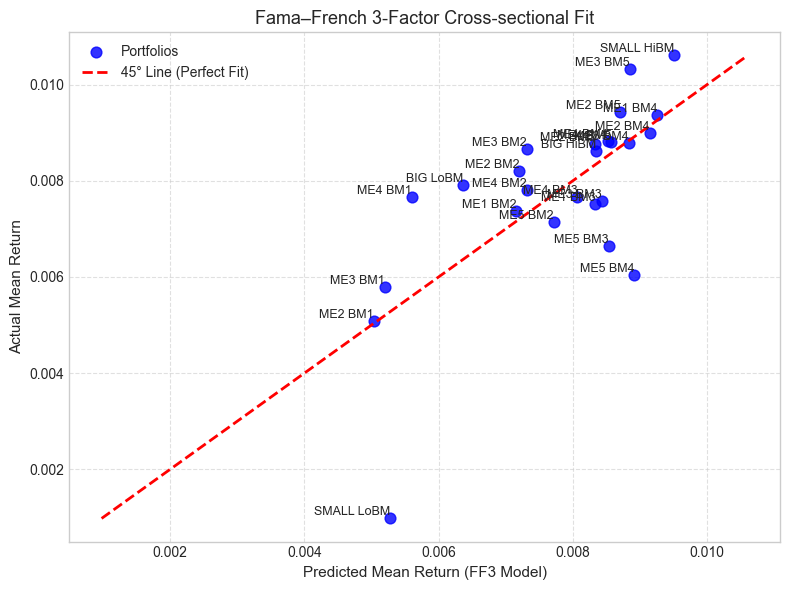

In [32]:
common_index = df.index.intersection(factor.index)
df = df.loc[common_index]
factor2 = factor.loc[common_index, ["Mkt-RF", "SMB", "HML"]]

alphas, betas_mkt, betas_smb, betas_hml, r2 = {}, {}, {}, {}, {}

for col in df.columns:
    y = df[col]
    X = sm.add_constant(factor2)
    model = sm.OLS(y, X).fit()
    alphas[col] = model.params["const"]
    betas_mkt[col] = model.params["Mkt-RF"]
    betas_smb[col] = model.params["SMB"]
    betas_hml[col] = model.params["HML"]
    r2[col] = model.rsquared

ff3_results = pd.DataFrame({
    "Alpha": alphas,
    "Beta_Mkt": betas_mkt,
    "Beta_SMB": betas_smb,
    "Beta_HML": betas_hml,
    "R^2": r2
}).T.round(4)

print("\n=== Fama-French 3-Factor Time-Series Regression ===")
print(ff3_results)


mean_excess_ret = df.mean()

cross_df = pd.DataFrame({
    "Mean Excess Return": mean_excess_ret,
    "Beta_Mkt": ff3_results.loc["Beta_Mkt"],
    "Beta_SMB": ff3_results.loc["Beta_SMB"],
    "Beta_HML": ff3_results.loc["Beta_HML"]
}).dropna()

X = sm.add_constant(cross_df[["Beta_Mkt", "Beta_SMB", "Beta_HML"]])
y = cross_df["Mean Excess Return"]
model_cs_ff3 = sm.OLS(y, X).fit()

print("\n=== Fama-French 3-Factor Cross-Sectional Regression ===")
print(model_cs_ff3.summary())

eta = model_cs_ff3.params["const"]
lambda_mkt = model_cs_ff3.params["Beta_Mkt"]
lambda_smb = model_cs_ff3.params["Beta_SMB"]
lambda_hml = model_cs_ff3.params["Beta_HML"]
r2_cs = model_cs_ff3.rsquared

summary_ff3 = pd.DataFrame({
    "Statistic": ["Intercept (η)", "λ_mkt", "λ_smb", "λ_hml", "R-squared"],
    "Value": [eta, lambda_mkt, lambda_smb, lambda_hml, r2_cs]
})
print("\nSummary Table:")
print(summary_ff3.round(4))

y_pred = model_cs_ff3.fittedvalues
y_actual = cross_df["Mean Excess Return"]

plt.figure(figsize=(8,6))
plt.scatter(y_pred, y_actual, color="blue", s=60, alpha=0.8, label="Portfolios")
plt.plot([y_actual.min(), y_actual.max()],
         [y_actual.min(), y_actual.max()],
         'r--', linewidth=2, label="45° Line (Perfect Fit)")

for name, x, y in zip(cross_df.index, y_pred, y_actual):
    plt.text(x, y, name, fontsize=9, ha='right', va='bottom')

plt.xlabel("Predicted Mean Return (FF3 Model)", fontsize=11)
plt.ylabel("Actual Mean Return", fontsize=11)
plt.title("Fama–French 3-Factor Cross-sectional Fit", fontsize=13)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

3.
We measured how well the CAPM performs by checking the MAE of the time-series alphas.

Under classic statistical assumptions, we can test the null hypothesis that the CAPM works by calculating,

This test statistic has a chi-squared distribution…

Note the following:

 is an 
 vector of the individual regression alphas, 
.

 is the 
 covariance matrix of the time-series of regression residuals, 
, corresponding to each regression.

 is the Sharpe-Ratio of 
.

The test statistic, 
, has a chi-squared distribution with 
 degrees of freedom. So under the null hypothesis of the CAPM holding, 
 should be small, and the distribution allows us to calculate the probability of seeing such a large 
, conditional on the CAPM being true.

Which is a stricter test: checking whether any of the 
 values of 
 have a statistically significant t-test or checking whether 
 calculated above is significant?

Conceptually, how does the test-statistic 
 relate to checking whether 
 spans the tangency portfolio?

In [33]:
from scipy.stats import chi2

common_index = df.index.intersection(factor.index)
R = df.loc[common_index].copy()                  
mkt = factor.loc[common_index, "Mkt-RF"].copy()  
T = len(R)
n = R.shape[1]

X = sm.add_constant(mkt)
alphas = []
resids = []

for col in R.columns:
    y = R[col]
    model = sm.OLS(y, X).fit()
    alphas.append(model.params["const"])
    resids.append(model.resid)

alpha_vec = np.array(alphas)                  
E = pd.concat(resids, axis=1).values          
Sigma_e = np.cov(E.T, ddof=1)                 

SR_mkt = mkt.mean() / mkt.std(ddof=1)

H = T * (1.0 / (1.0 + SR_mkt**2)) * (alpha_vec @ np.linalg.inv(Sigma_e) @ alpha_vec)
p_value = chi2.sf(H, df=n)

print(f"H statistic: {H:.4f}")
print(f"Degrees of freedom: {n}")
print(f"Chi-square p-value: {p_value:.6f}")

H statistic: 125.9175
Degrees of freedom: 25
Chi-square p-value: 0.000000


In [34]:
alpha_tstats = []
alpha_pvals  = []

for col in R.columns:
    y = R[col]
    model = sm.OLS(y, X).fit()
    alpha_tstats.append(model.tvalues["const"])
    alpha_pvals.append(model.pvalues["const"])

alpha_test = pd.DataFrame({
    "t(alpha)": alpha_tstats,
    "p(alpha)": alpha_pvals
}, index=R.columns).sort_values("p(alpha)")

print("\nSmallest 5 alpha p-values (individual tests):")
print(alpha_test.head(5).round(4))


bonf_alpha = 0.05 / n
num_sig = (alpha_test["p(alpha)"] < bonf_alpha).sum()
print(f"\nBonferroni 5% threshold: {bonf_alpha:.4g} | # of significant alphas: {num_sig}")



Smallest 5 alpha p-values (individual tests):
            t(alpha)  p(alpha)
SMALL LoBM   -3.9879    0.0001
ME2 BM1      -2.6500    0.0083
ME3 BM1      -2.3669    0.0183
SMALL HiBM    2.0165    0.0442
ME3 BM5       1.9010    0.0578

Bonferroni 5% threshold: 0.002 | # of significant alphas: 1
